In [1]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import Input

In [6]:
# Step 2: Load the Boston Housing dataset
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [25]:
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

Training data shape: (404, 13)
Test data shape: (102, 13)


In [26]:
# Step 3: Data Normalization
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [27]:
# Step 4: Build the Neural Network model
model = Sequential([
    Input(shape=(x_train.shape[1],)),  # Explicit input layer
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)  # Linear output for regression
])

In [28]:
# Step 5: Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [35]:
# Step 6: Train the model
history = model.fit(x_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=0)

In [30]:
# Step 7: Evaluate the model
test_loss, test_mae = model.evaluate(x_test_scaled, y_test)
print(f"\nTest Mean Absolute Error: {test_mae:.2f}") 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18.5308 - mae: 2.9849

Test Mean Absolute Error: 3.22


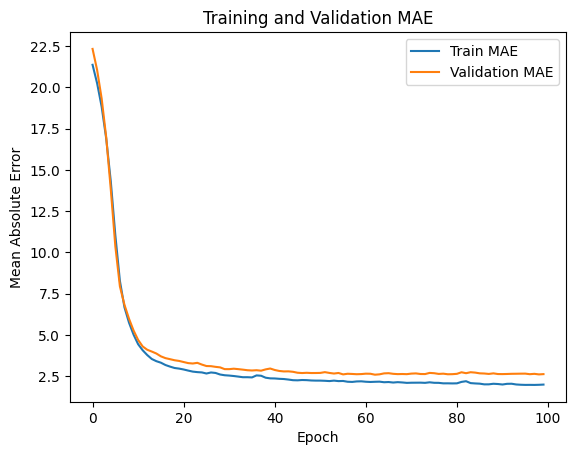

In [32]:
# Step 8: Plot training history
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()

In [33]:
# Step 9: Predict on test data
predictions = model.predict(x_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [34]:
# Step 10: Show some predictions vs actual
for i in range(5):
    print(f"Predicted: {predictions[i][0]:.2f}, Actual: {y_test[i]}")

Predicted: 7.51, Actual: 7.2
Predicted: 17.57, Actual: 18.8
Predicted: 21.66, Actual: 19.0
Predicted: 31.93, Actual: 27.0
Predicted: 25.46, Actual: 22.2


In [37]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,365 (60.02 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,244 (40.02 KB)